### CASA0002

# Urban Simulation
***
## Linear Algebra with Numpy

Mateo Neira
***

For both Spatial Interaction Models and Urban Networks it's important to have a basic understanding of linear algebra concepts and to be able to work with and manipulate vectors and matrices in python. 

In this lab we will cover the basics of working with numpy, which will serve as a base for the rest of the practicals in this module.

**Objectives**
* Review basic numpy functions
* define a vector and calculate a vector length and dot product
* define a matrix and calculate a matrix multiplication, transpose, and inverse
* eigenvalues and eigenvectors

## Numpy

Numpy is the fundamental package for scientific computing with Python. It provides numerical functions on _ndarray_ which are fixed size n-dimensional array data structures. Numpy is implemented in C where its memory is more efficiently stored. 

Numpy arrays form the core of nearly the entire ecosystem of data science tools in Python, so time spent learning to use numpy effectively will be useful not only in this module, but other data science applications as well. Here we will be using _ndarray_ to represent vectors and matrices. 

We can import numpy using:

```python
import numpy as np
```



In [15]:
### let's first import the numpy library
import numpy as np

np?

Type:        module
String form: <module 'numpy' from 'C:\\Users\\dune\\AppData\\Roaming\\Python\\Python311\\site-packages\\numpy\\__init__.py'>
File:        c:\users\dune\appdata\roaming\python\python311\site-packages\numpy\__init__.py
Docstring:  
NumPy
=====

Provides
  1. An array object of arbitrary homogeneous items
  2. Fast mathematical operations over arrays
  3. Linear Algebra, Fourier Transforms, Random Number Generation

How to use the documentation
----------------------------
Documentation is available in two forms: docstrings provided
with the code, and a loose standing reference guide, available from
`the NumPy homepage <https://numpy.org>`_.

We recommend exploring the docstrings using
`IPython <https://ipython.org>`_, an advanced Python shell with
TAB-completion and introspection capabilities.  See below for further
instructions.

The docstring examples assume that `numpy` has been imported as `np`::

  >>> import numpy as np

Code snippets are indicated by three grea

There are different types of objects (or structures) in linear algebra:
* Scalar: Single number
* Vector: Array of numbers
* Matrix: 2-dimensional array of numbers
* Tensor: N-dimensional array of numbers where n > 2

### Numpy Arrays - Vectors

![1d-array](https://raw.githubusercontent.com/mateoneira/urban_simulation/main/practicals/week1/images/1d.png)

> $x \in \mathbb{R}^n$
 
One dimensional ndarray represent a vector of elements.

For example we can create the following vector $\vec{x} = \begin{bmatrix}2 & 3 & 4 \end{bmatrix}$ in numpy:

```python
x = np.array([2,3,4])
```

In [16]:
### make a 1d array
x=np.array([1,1,1,1,1,1,1,2,2,3,4,5,6,7,8,10])

print (x.ndim)
print (x.size)
print (x.shape)

# similar to python data type (int,float,bool)
print (x.dtype)

1
16
(16,)
int32


### Numpy Arrays - Matrix

![matrix](https://raw.githubusercontent.com/mateoneira/urban_simulation/main/practicals/week1/images/2d.png)

> $X \in \mathbb{R}^{n*m}$

Two dimensional ndarray represents a matrix of elements.

For example we can create the following matrix $ X = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}$ in numpy:

> X = np.array([[1, 2, 3], [4, 5, 6]])

In [17]:
### make a 2d array
X=np.array([[1,2,3],
            [4,5,6]])

print (X.ndim)
print (X.size)
print (X.shape)
print (X.dtype)

2
6
(2, 3)
int32


### Numpy Arrays - Multidimensional arrays (Tensors)

![tensor](https://raw.githubusercontent.com/mateoneira/urban_simulation/main/practicals/week1/images/3d.png)

We can also use ndarray to create multidimensional arrays. These are often useful to represent tensors.

Images, for example can be represented as a three-dimensional array where the shape = (channel,height, width).

```python
X = np.array([ [[1, 2],[4, 5]],
               [[2, 5], [6, 4]],
               [[2, 5],[6, 4]]])
```

In [18]:
### make a 3d array
X=np.array( [[[1, 2], [4, 5]],
             [[2, 5], [6, 4]],
             [[2, 5], [6, 4]]])

print (X.ndim)
print (X.size)
print (X.shape)
print (X.dtype)

3
12
(3, 2, 2)
int32


### indexing

Individual elements in arrays can be retrieved using the [] indexer. We can also use the [] indexer to set values of individual array elements. Python is zero-indexed, meaning that the first element has to be accessed with index 0.

```python 
x[0] = 5
```

In [19]:
x=np.array([5,3,8,9])

### indexing
print(x[0])

### setting the value of individual element
### this will set the second element in the vector to 0
x[1]=0
print(x)

5
[5 0 8 9]


In multi-dimensional arrays, items can be accessed using a comma-separated tuple of indices. 

For example the element $x_{1,2}$ from the matrix $X$ can be accessed using:

```python
X[0,1]
```

In [20]:
X = np.array([[1, 2, 3], [4, 5, 6]])
print(X)
print(X[0,1])

X[0,1] = 10
X

[[1 2 3]
 [4 5 6]]
2


array([[ 1, 10,  3],
       [ 4,  5,  6]])

Values can also be modified in multi-dimensional arrays using the same index notation.

In [21]:
X[1,2]=10
X

array([[ 1, 10,  3],
       [ 4,  5, 10]])

### slicing

In the same way that we can use [] to access individual elements, we can also use them to access subarrays with the *slice* notation by using colon (:). 

```python 
x[start:stop:step]
```

By default these values take start = 0, stop = size of dimension, step = 1

In [22]:
### get first two elements
print(x)
x[:2]

[5 0 8 9]


array([5, 0])

In [23]:
### get all elements after second
x[2:]

array([8, 9])

In [24]:
## elements in the middle of the array
x[2:4]

array([8, 9])

In [25]:
## similarly with multi-dimensional arrays
## get first 2 columns and first 2 rows
print(X)
X[:2,:2]

[[ 1 10  3]
 [ 4  5 10]]


array([[ 1, 10],
       [ 4,  5]])

### reshaping

Reshaping is another useful operation, and can be called using the _.reshape_ method. 

As an example, we can create an array of the number 1 through 9, and reshape into a 3 x 3 grid:

```python
x = np.arange(1,10)
X = x.reshape((3,3))
```

In [26]:
# .arange() creates envely spaced values with a given interval
x = np.arange(1,10)
X = x.reshape((3,3))
print(x)
print(X)

[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


### mathematical function

So far we have been discussing some of the basics of numpy, basically creating, accessing and modifying _ndarrays_. However, the power of **numpy** lies in its easy and flexible interface to optimize computation over these _ndarrays_.

### array arithmetic

We can use python native arithmatic operators on _ndarrays_. For example, standard addition, subtraction, multiplication, and division can be used.

In [27]:
# arithmatic operations on arrays 
x = np.array([1, 2, 3])

print (x + 1)
print (x * 2)
print (x ** 2)

a = np.array([1,2])
b = np.array([1,2,3,4])

a+b

[2 3 4]
[2 4 6]
[1 4 9]


ValueError: operands could not be broadcast together with shapes (2,) (4,) 

Note that these operations are 'broadcasted' to the array. In a nutshell 'broadcasting' describes how numpy treats arrays with different shapes during arithmatic operation. These operations are run element-wise.

see: https://numpy.org/doc/stable/user/basics.broadcasting.html

We can also sum over a given axis in an array using the _.sum()_ method. 

Imagine we have 
$$ T = \begin{bmatrix} 5 & 2 & 10 \\ 6 & 8 & 4 \\ 10 & 4 & 6  \end{bmatrix}$$ 

representing a origin-destination matrix. We can quickly calculate totals at origins $O_i = \sum_j T_{ij}$ and destination $D_j = \sum_i T_{ij}$:

```python
Origins = T.sum(axis=1)
Destinations = T.sum(axis=0)
```

In [ ]:
# define array
T = np.array([[5,2,10],
              [6,8,4],
              [10,4,6]
             ])

# sum across rows
origins = T.sum(axis=1)
print(origins)

# sums across columns
destinations = T.sum(axis=0)
print(destinations)

### dot products

The dot product of two vectors is the sum of the products of elements in the first vector with the corresponding elements in the second vector:

$$ c = a \cdot b $$

```python
c = np.dot(a,b)
```

Dot products are an essential part in matrix multiplication which we will discuss next.

In [ ]:
# dot product between two arrays (product-sum between the two arrays)
v1 = np.array([1,2,3])
v2 = np.array([4,5,6])
np.dot(v1,v2)

### matrix operations

we will end this practical with widely-used operations in linear algebra. Matrix operations for the basis for a lot of the methods we use in urban networks. Although a lot of the computation will be abstracted away once we start using other packages, such as networkx, its important to understand and be able to run these calculations directly with matrices. 

In [ ]:
# let's create a square matrix
X = np.random.randint(10, size = (3,3))
X

**identity matrix**: the identity matrix contains ones on the main diagnal and zeros in all other positions.

$$ I = \begin{bmatrix} 1 &  0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1  \end{bmatrix}$$

In [ ]:
I = np.identity(3, dtype=int)
I

The identity matrix has the property that when multiply any matrix of the same dimension, we get back the same matrix.

$$ IX = X $$

### matrix multiplication

matrix multiplication is based on dot products of rows of one matrix with the columns of the other matrix.

```python
np.matmul(A,B)
```

Since the rows of the first matrix are multiplied by the columns of the second matrix, the number of rows of the first matrix must be equal to the number of columns of the second matrix. Please not that because of this, matrix multiplication is **not commutative**: $AB \neq BA$

In [ ]:
A = np.random.randint(5, size = (3,3))
B = np.random.randint(5, size = (3,3))

print(A)
print(B)

np.matmul(A,B)

### eigenvectors and eigenvalues

If we have a square matrix $A$, a non-zero vector $v$ is an eingenvector for A with eigenvalue $\lambda$ if:

$$ A\vec{v} = \lambda \vec{v}$$

We can calculate the eigenvectors and corresponding eigenvalues of a matrix using the linear algebra functions of numpy.

```python
np.linalg.eig(A)
```

In [ ]:
print(A)
eigen_vals, eigen_vects = np.linalg.eig(A)
print(eigen_vals)
print(eigen_vects)

# Applications

We'll get London Underground origin-destination flows from [TfL](http://crowding.data.tfl.gov.uk/). The data is in a csv file, which we can read using pandas.

In [ ]:
import pandas as pd

In [33]:
# pandas has great functionality for reading data straight in from the web
underground = pd.read_csv("http://crowding.data.tfl.gov.uk/NUMBAT/NUMBAT%202022/NBT22_OD_Data/NBT22TWT2b_od_mode_LU_tb_wf_o.csv")
underground.head()

,mode_mnlc_o,mode_mnlc_d,2,3,4,5,6,7
0,500,501,0.109170,3.024224,1.216441,2.286631,1.035529,1.874408e-07
1,500,502,0.299429,2.068166,1.299529,1.349854,0.000000,0.000000e+00
2,500,503,2.494437,9.429101,6.712374,2.578263,0.357071,3.346121e-01
3,500,505,13.763818,15.424232,28.659498,54.254696,19.389862,6.248488e+00
4,500,506,0.000262,0.004255,0.283759,0.161484,0.368922,8.238375e-04


In [34]:
names = pd.read_excel('http://crowding.data.tfl.gov.uk/NUMBAT/NUMBAT%202019/NBT19_Definitions_Published.xlsx', sheet_name=5)
names = names.dropna()
names['MNLC'] = names['MNLC'].astype(int)
names = names[names.MNLC.isin(underground.mode_mnlc_o)]
names.head() 

,MNLC,MASC,StationName,TFL?
0,500,ACTu,Acton Town,True
1,501,BARu,Barbican,True
2,502,ALDu,Aldgate,True
3,503,ALEu,Aldgate East,True
5,505,ALPu,Alperton,True


In [35]:
# add origin and destination names to the dataframe, repair the station name column
underground = underground.merge(names[['MNLC', 'StationName']], left_on='mode_mnlc_o', right_on='MNLC', how='left').rename(columns={'StationName': 'Origin'}).drop('MNLC', axis=1).merge(names[['MNLC', 'StationName']], left_on='mode_mnlc_d', right_on='MNLC', how='left').rename(columns={'StationName': 'Destination'}).drop('MNLC', axis=1).dropna()
underground.head()

,mode_mnlc_o,mode_mnlc_d,2,3,4,5,6,7,Origin,Destination
0,500,501,0.109170,3.024224,1.216441,2.286631,1.035529,1.874408e-07,Acton Town,Barbican
1,500,502,0.299429,2.068166,1.299529,1.349854,0.000000,0.000000e+00,Acton Town,Aldgate
2,500,503,2.494437,9.429101,6.712374,2.578263,0.357071,3.346121e-01,Acton Town,Aldgate East
3,500,505,13.763818,15.424232,28.659498,54.254696,19.389862,6.248488e+00,Acton Town,Alperton
4,500,506,0.000262,0.004255,0.283759,0.161484,0.368922,8.238375e-04,Acton Town,Amersham


In [36]:
names.shape

(268, 4)

In [37]:
# create a list of unique stations
stations = list(set(underground['mode_mnlc_o']))

# create a square matrix of zeros
matrix = np.zeros((len(stations),len(stations)))

# loop through the rows of the dataframe
for i,row in underground.iterrows():
    # get the origin and destination
    origin = row['mode_mnlc_o']
    destination = row['mode_mnlc_d']
    # get the row and column index
    row_index = stations.index(origin)
    col_index = stations.index(destination)
    # add the value to the matrix
    matrix[row_index,col_index] = row['2']

matrix.shape


NameError: name 'undeground' is not defined

In [38]:
# we can do this much easier in pandas
wide = underground.pivot(index='mode_mnlc_o', columns='mode_mnlc_d', values='2').fillna(0)
# convert to numpy array
matrix = wide.to_numpy()
matrix.shape

(268, 268)

In [39]:
wide.iloc[205, 205]

0.0

In [ ]:
matrix[205, 205]

0.0

In [40]:
names.set_index('MNLC', inplace=True)

In [41]:
def lookup_flow(row, column, wide_data=wide, station_names=names):
    rows = wide_data.index
    cols = wide_data.columns
    return station_names.loc[rows[row], 'StationName'] + ' to ' + station_names.loc[cols[column], 'StationName']

def lookup_station(row, wide_data=wide, station_names=names):
    rows = wide_data.index
    return station_names.loc[rows[row], 'StationName']

When we build an adjacency matrix, each node corresponds to a row and column and the value of each cell is the number of trips between the two nodes.

Text(0.5, 1.0, 'Adjacency Matrix')

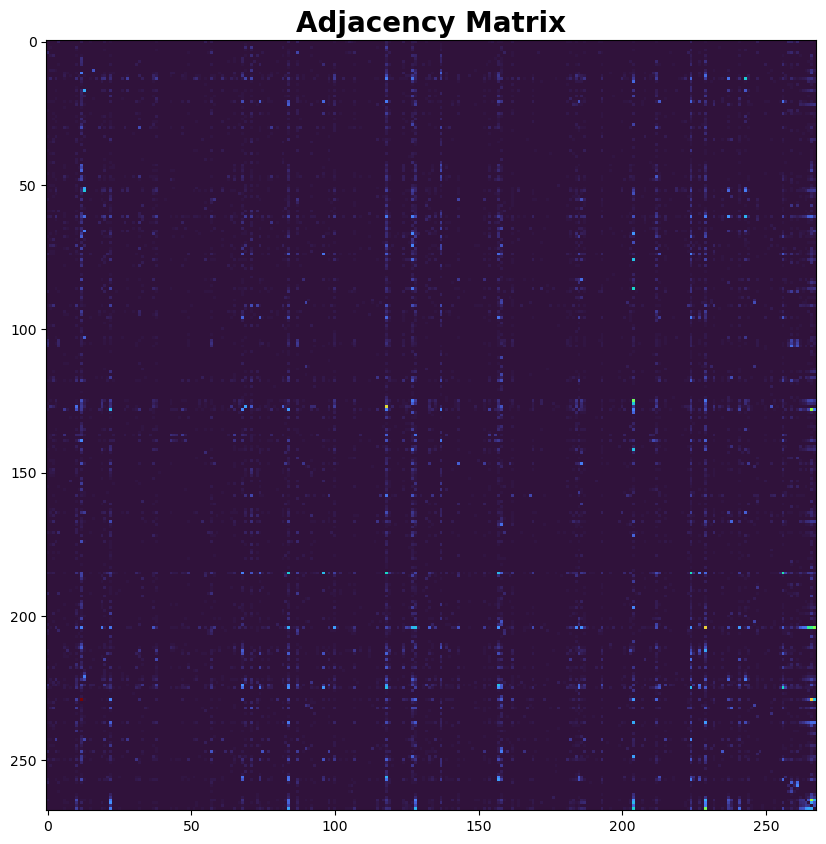

In [42]:
# plot the adjacency matrix
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,10))
plt.imshow(matrix, cmap='turbo', interpolation='nearest')
plt.title('Adjacency Matrix', fontsize=20, weight='bold')

Text(0.5, 1.0, 'Sorted Adjacency Matrix')

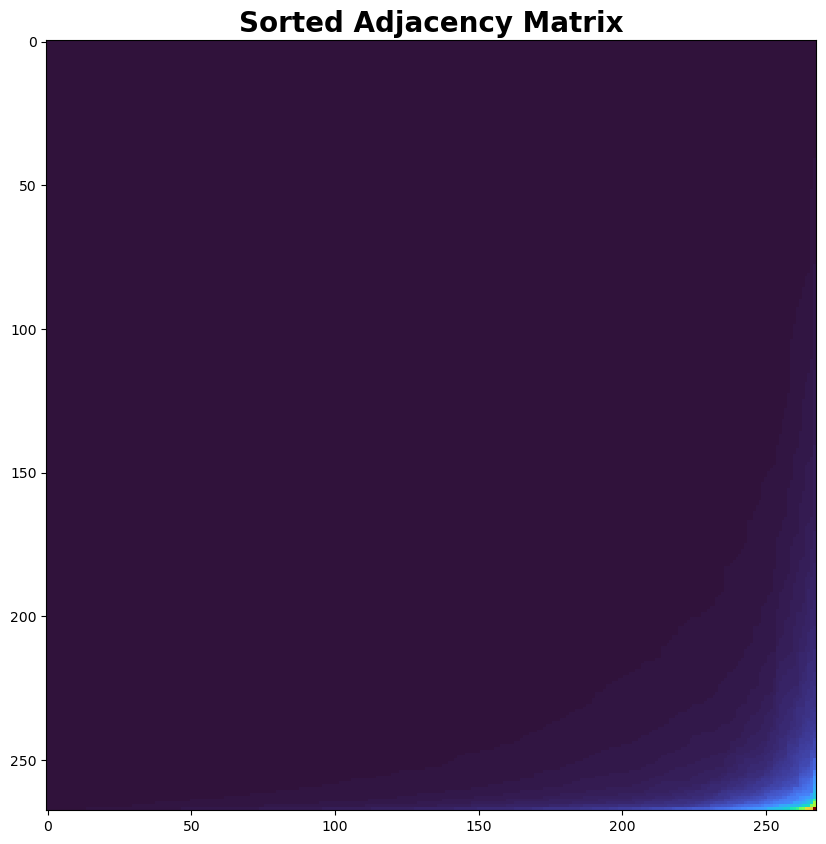

In [43]:
# sort the matrix along both dimensions then plot again
plt.figure(figsize=(10,10))
plt.imshow(np.sort(np.sort(matrix, axis=0),axis=1), cmap='turbo', interpolation='nearest')
plt.title('Sorted Adjacency Matrix', fontsize=20, weight='bold')


Text(0.5, 1.0, 'Sorted Adjacency Matrix (log)')

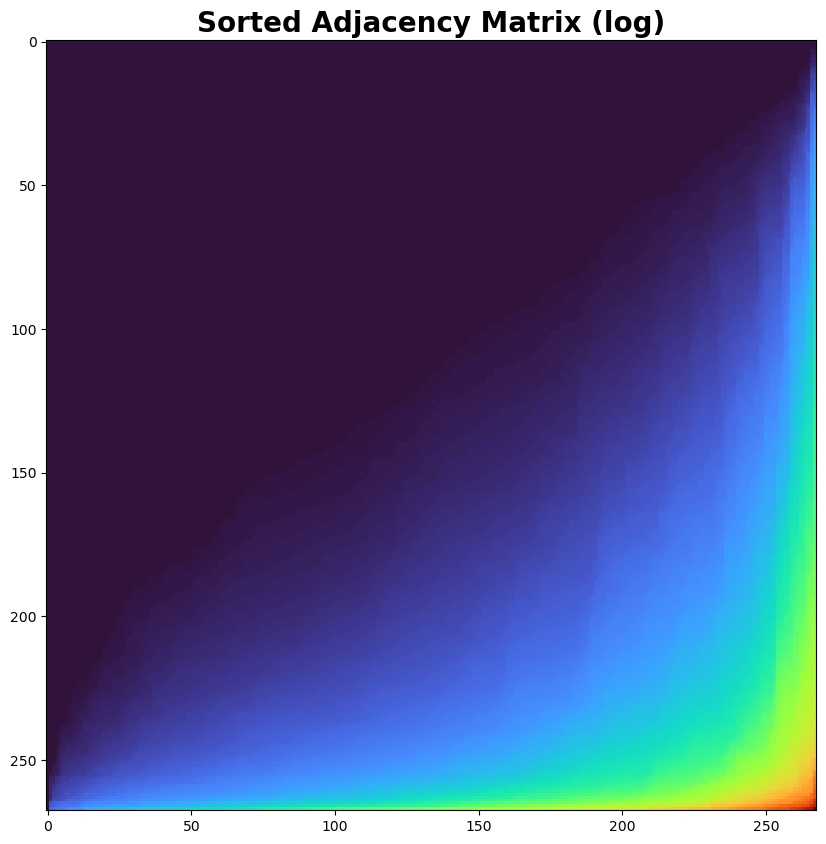

In [44]:
# try again with cmap in log scale
from matplotlib.colors import LogNorm
plt.figure(figsize=(10,10))
plt.imshow(np.sort(np.sort(matrix + 1,axis=0),axis=1), cmap='turbo', interpolation='nearest', norm=LogNorm())
plt.title('Sorted Adjacency Matrix (log)', fontsize=20, weight='bold')

In [45]:
# get the index value for the large flow
row, col = np.where(matrix == np.max(matrix))
lookup_flow(row[0], col[0])

'Waterloo LU to Bank and Monument'

Text(0.5, 1.0, 'Cosine Similarity Matrix')

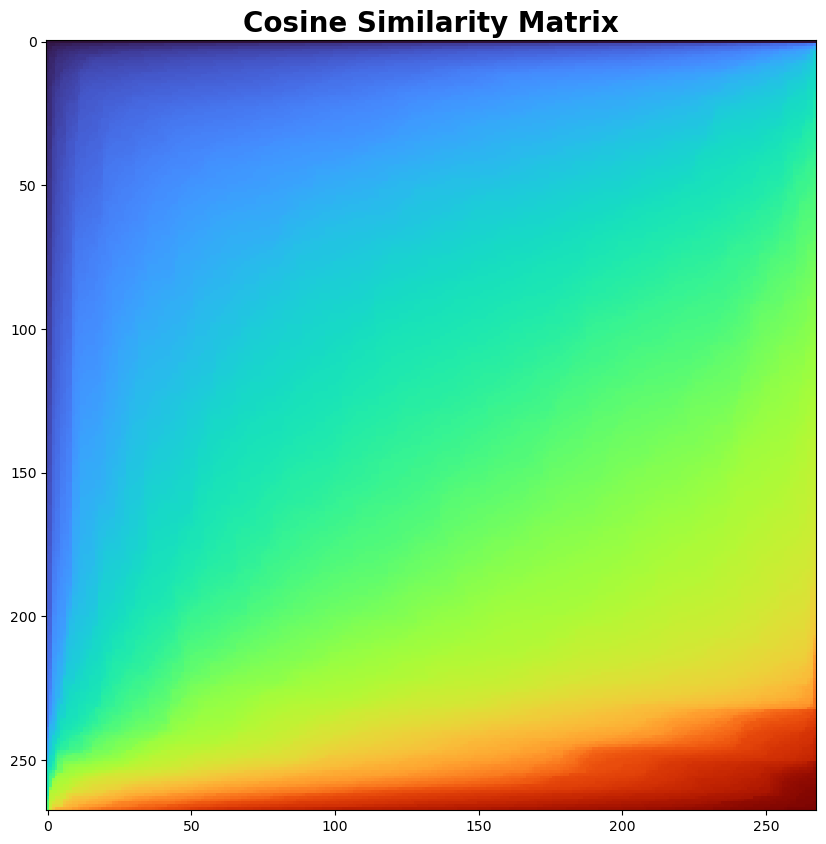

In [46]:
# let's find the 2 rows of the matrix with the highest cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# compute the cosine similarity between each row and every other row
cosine_similarities = cosine_similarity(matrix)

# zero out the diagonal
np.fill_diagonal(cosine_similarities, 0)

# plot the cosine similarity matrix for the sorted adjacency matrix
plt.figure(figsize=(10,10))
plt.imshow(np.sort(np.sort(cosine_similarities, axis=0),axis=1), cmap='turbo', interpolation='nearest')
plt.title('Cosine Similarity Matrix', fontsize=20, weight='bold')

In [47]:
# which 2 stations have the highest cosine similarity?
row, col = np.where(np.triu(cosine_similarities, k=1) > 0.95)
for i in range(len(row)):
    print(lookup_station(row[i]) + ' and ' + lookup_station(col[i]))

Balham LU and Clapham Common
Balham LU and Clapham North
Balham LU and Clapham South
Barkingside and Fairlop
Barkingside and Gants Hill
Barkingside and Hainault
Barkingside and Leyton
Barkingside and Leytonstone
Barkingside and Newbury Park
Barkingside and South Woodford
Barkingside and Woodford
Becontree and Dagenham East
Becontree and Dagenham Heathway
Becontree and Elm Park
Becontree and Hornchurch
Becontree and Upney
Blackhorse Road and Walthamstow Central
Bounds Green and Wood Green
Buckhurst Hill and Epping
Buckhurst Hill and Loughton
Buckhurst Hill and Theydon Bois
Chalk Farm and Highgate
Clapham Common and Clapham North
Clapham Common and Clapham South
Clapham North and Clapham South
Colliers Wood and Morden
Colliers Wood and Tooting Broadway
Dagenham East and Dagenham Heathway
Dagenham East and Elm Park
Dagenham East and Hornchurch
Dagenham East and Upney
Dagenham Heathway and Elm Park
Dagenham Heathway and Hornchurch
Dagenham Heathway and Upney
Debden and Epping
Debden and Fa

Text(0.5, 1.0, 'Out-degree distribution')

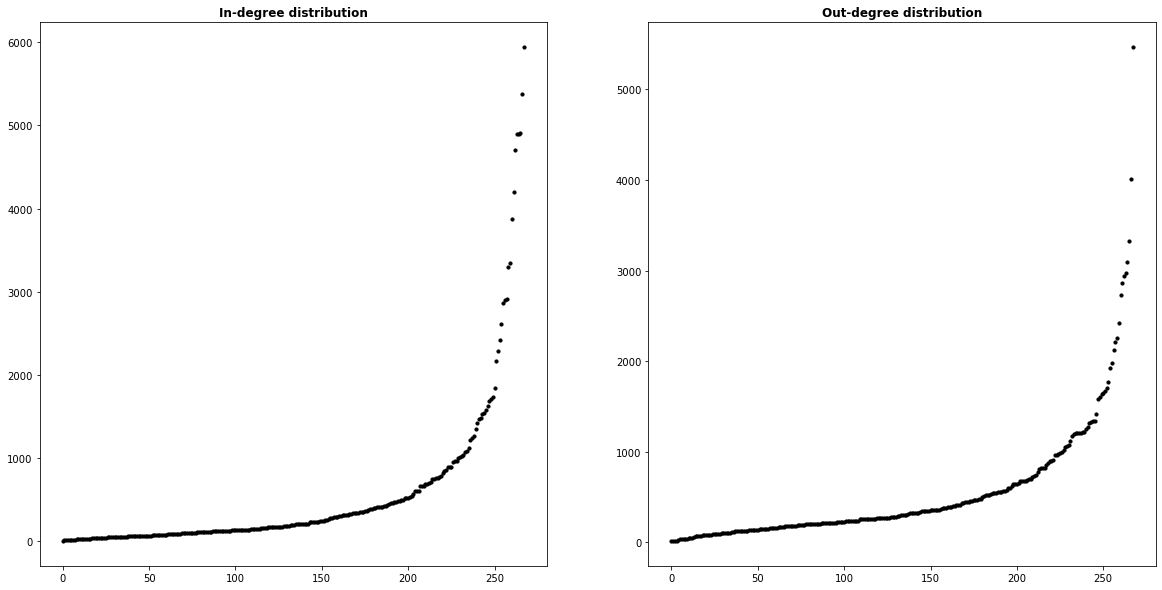

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))
# plot the in-degree distribution (row sums)
axs[0].scatter(range(0, len(matrix)), np.sort(np.sum(matrix, axis=0)), color='k', s=10)
axs[0].set_title('In-degree distribution', weight='bold')
# plot the out-degree distribution (column sums)
axs[1].scatter(range(0, len(matrix)), np.sort(np.sum(matrix, axis=1)), color='k', s=10)
axs[1].set_title('Out-degree distribution', weight='bold')

In [ ]:
# get the top 10 stations by in-degree
for i in np.argsort(np.sum(matrix, axis=0))[-10:]:
    print(lookup_station(i))

London Bridge LU
Oxford Circus
Green Park
Liverpool Street LU
Victoria LU
Stratford
Canary Wharf LU
Bank and Monument
Waterloo LU
King's Cross St. Pancras


### What are eigenvectors good for?

Eigenvectors are often uses to understand how important nodes are on the network. In this case, we are thinking of stations. Eigenvector centrality uses matrix multiplication to calculate the importance of a node based on the importance of its neighbors, and so forth. We take a matrix and iteratively multiply it by another matrix, beginning with a vector of ones and then moving on to the resulting values from that multiplication. By the end, each row will have a value that represents the importance of that the corresponding node. 

In [ ]:
# what will the shape of this matrix be after we multiply by a vector of ones?
matrix.shape

(268, 268)

In [ ]:
# normalise the degree
def normalise(x):
    return x / np.sqrt(np.sum(np.square(x), axis=0))
    # alternative to normalise is norm // degree / np.linalg.norm(degree, axis=0)

# initialise with an array of ones, which is just sums the rows, or computes "degree", to start the process
eigenvector_centrality = np.ones((len(matrix), 1))

# initialise a matrix that will store all the eigenvector centrality scores as we iterate
eigenvector_centralities = np.zeros((len(matrix), 100))

# iteratively update the eigenvector centrality
for i in range(100):
    eigenvector_centrality = matrix.dot(eigenvector_centrality)
    eigenvector_centrality = normalise(eigenvector_centrality)
    eigenvector_centralities[:, i] = eigenvector_centrality[:, 0]

# Final eigenvector centrality scores
eigenvector_centrality

array([[0.01391623],
       [0.00295869],
       [0.00713671],
       [0.00946705],
       [0.00772689],
       [0.01625926],
       [0.01046824],
       [0.0183449 ],
       [0.02343147],
       [0.0043843 ],
       [0.02741752],
       [0.0434084 ],
       [0.05986037],
       [0.12106655],
       [0.05001516],
       [0.00728287],
       [0.00458535],
       [0.07390816],
       [0.00601241],
       [0.04237821],
       [0.00808789],
       [0.07331325],
       [0.04740485],
       [0.00430234],
       [0.00431355],
       [0.03202734],
       [0.01204369],
       [0.01142915],
       [0.01410817],
       [0.03048588],
       [0.04215135],
       [0.00831069],
       [0.01515395],
       [0.00630501],
       [0.02958062],
       [0.00977095],
       [0.00614794],
       [0.00460735],
       [0.01291804],
       [0.00887483],
       [0.00601332],
       [0.00352307],
       [0.00962054],
       [0.02642797],
       [0.02139941],
       [0.02968697],
       [0.00926213],
       [0.040

Text(0.5, 1.0, 'Convergence of eigenvector centrality')

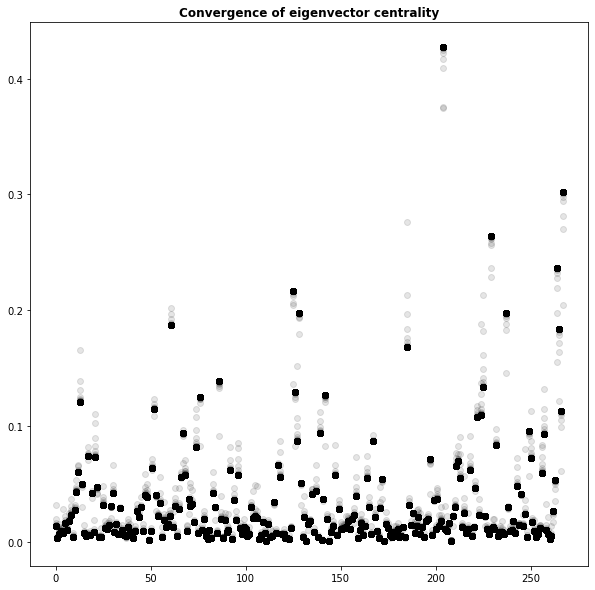

In [ ]:
# plot the convergence of the eigenvector centrality scores as a scatter plot where each color is a different iteration
fig, ax = plt.subplots(figsize=(10,10))
for i in range(100):
    ax.scatter(np.arange(len(matrix)), eigenvector_centralities[:, i], color='k', alpha=0.1)

ax.set_title('Convergence of eigenvector centrality', weight='bold')

Text(0.5, 1.0, 'Convergence of eigenvector centrality')

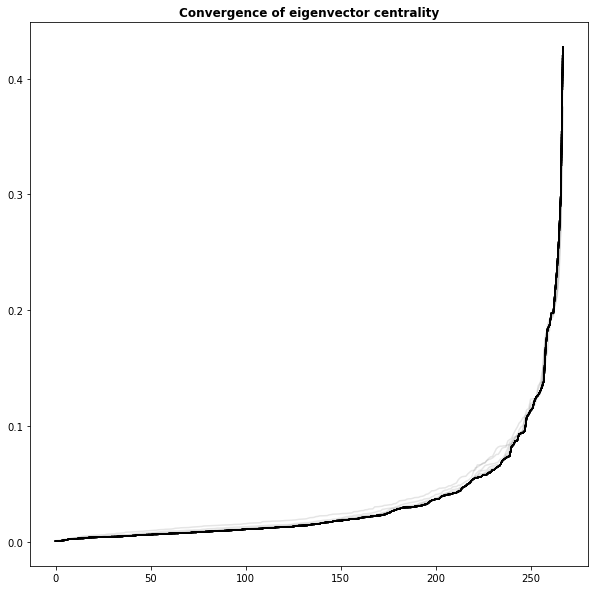

In [ ]:
# plot the eigenvector for each iteration as a sorted line plot where each colour corresponds to a different iteration
fig, ax = plt.subplots(figsize=(10,10))
for i in range(100):
    ax.plot(np.sort(eigenvector_centralities[:, i]), color='k', alpha=0.1)

ax.set_title('Convergence of eigenvector centrality', weight='bold')

In [ ]:
# get the index value of highest eigenvector centrality score, look up the station name, and print it
lookup_station(eigenvector_centrality.argmax())

'Stratford'

/Users/andrewrenninger/opt/anaconda3/envs/sandbox/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 1.0, 'Scipy solution to eigenvector centrality')

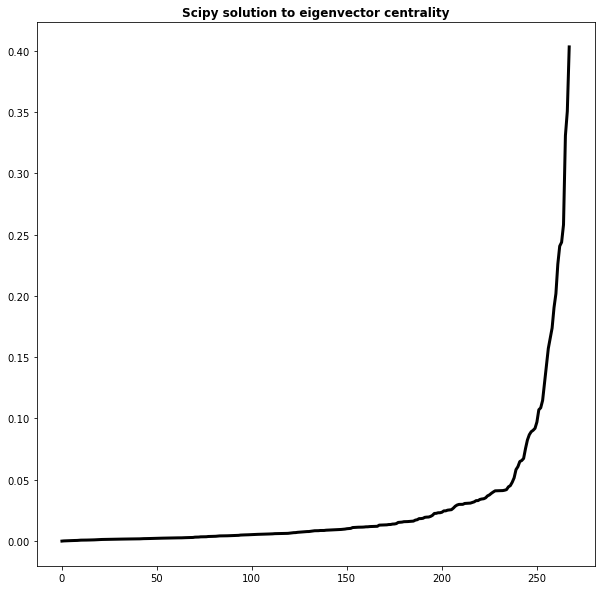

In [ ]:
# create scipy sparse matrix
import scipy as sp
from scipy.sparse import linalg

M = sp.sparse.csr_matrix(matrix)
_, eigenvector = sp.sparse.linalg.eigs(
    M.T, k=1, which="LR", maxiter=20
    )

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(np.sort(eigenvector[:, 0]), color='k', linewidth=3)
ax.set_title('Scipy solution to eigenvector centrality', weight='bold')

In [ ]:
# make a networkx graph from the edgelist
import networkx as nx

In [ ]:
G = nx.from_pandas_edgelist(underground, source='Origin', target='Destination', edge_attr='2')

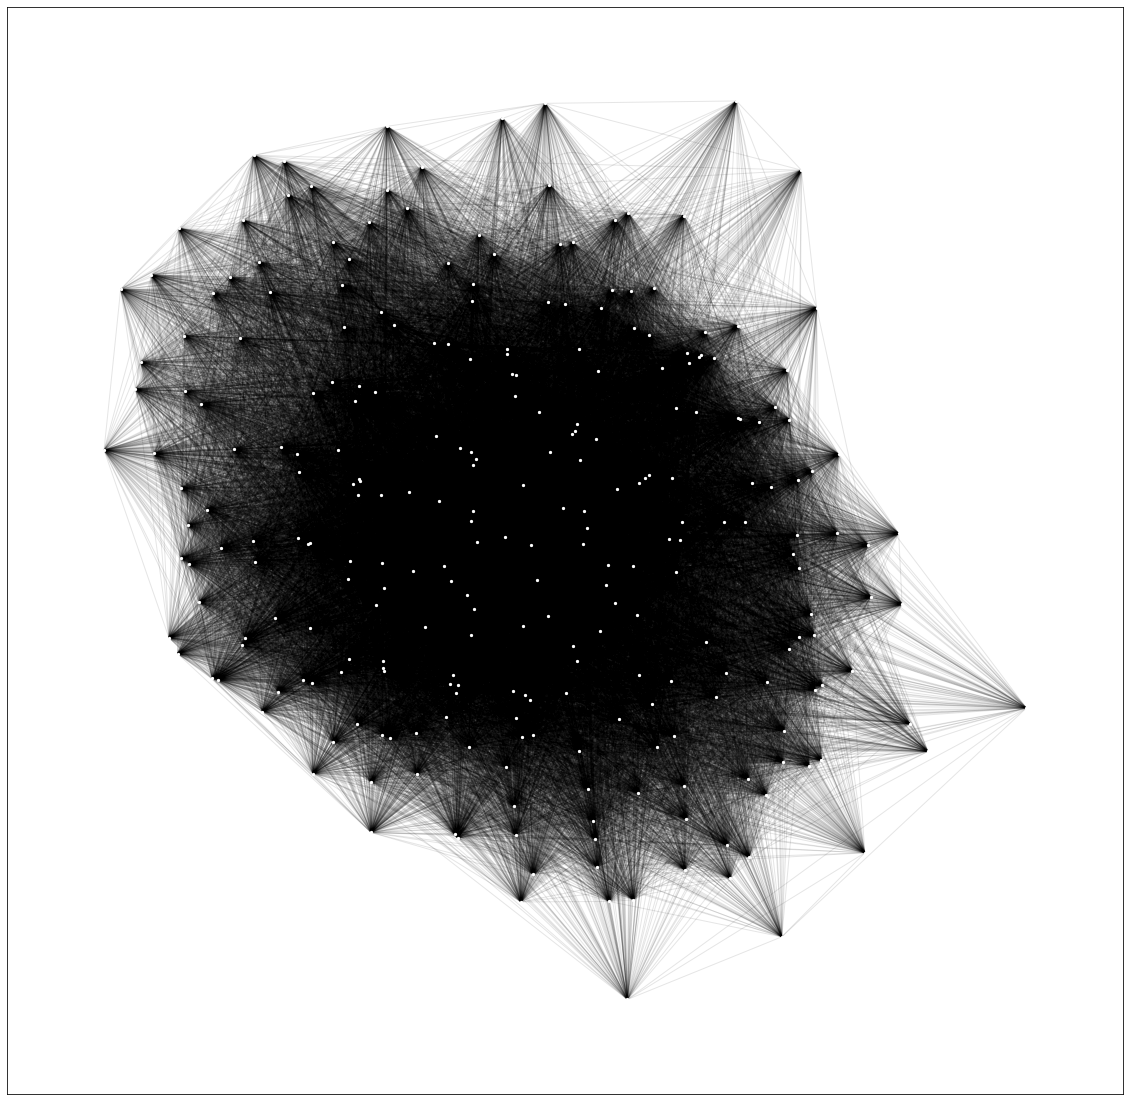

In [ ]:
# plot the network
fig, ax = plt.subplots(figsize=(20, 20))

# draw the edges
nx.draw_networkx_edges(G, pos=nx.spring_layout(G, seed=42), alpha=0.1, ax=ax)
# draw the nodes
nx.draw_networkx_nodes(G, pos=nx.spring_layout(G, seed=42), node_size=5, node_color='w', ax=ax)

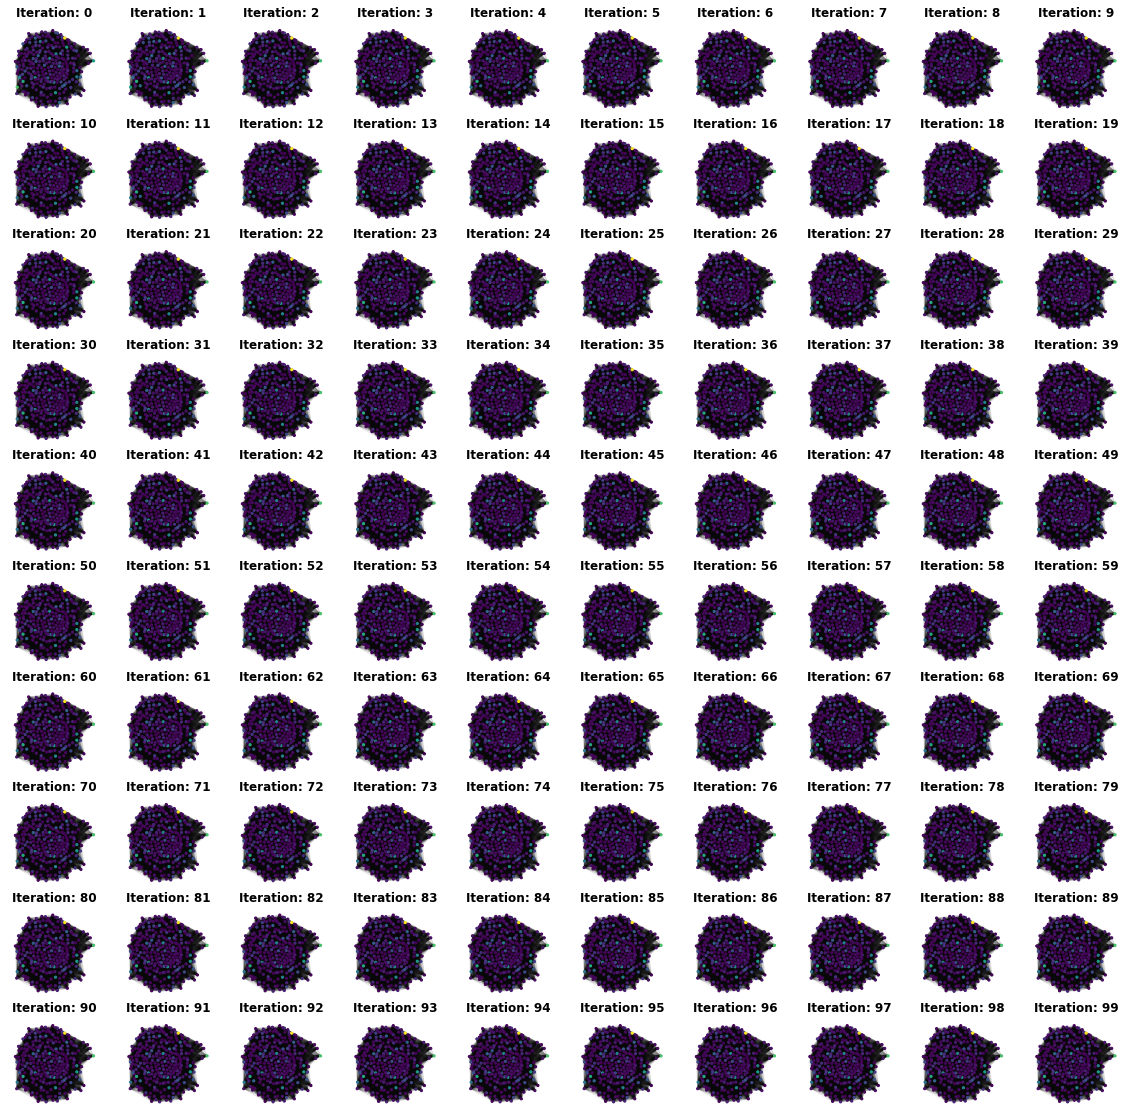

In [ ]:
# create a 10 x 10 figure
fig, axs = plt.subplots(10, 10, figsize=(20,20))
axs = axs.ravel()

# let's use kamada-kawai layout
pos = nx.kamada_kawai_layout(G)

# loop through the first 100 eigenvector centrality scores
for i in range(100):
    # map color to node
    c = dict(zip(list(G.nodes()),  eigenvector_centralities[:, i]))
    # draw the edges
    nx.draw_networkx_edges(G, pos=pos, alpha=0.1, ax=axs[i])
    # draw the nodes coloured according to eigenvector centrality
    nx.draw_networkx_nodes(G, pos=pos, node_size=5, node_color=list(c.values()), ax=axs[i])
    # set the title
    axs[i].set_title('Iteration: ' + str(i), weight='bold')
    # remove the axis
    axs[i].axis('off')

Does this even make sense? What does it mean to be adjacent to other busy stations in a transit network? 

### References

* Python for Data Analysis: Data Wrangling with Pandas, NumPy, and Ipython (Wes McKinney)


* Numpy reference: https://numpy.org/doc/stable/reference/index.html

